# Exercise 2
# Exploring hypothesis testing - Snow Grain Radius

* **Description**: Reads in netcdf files of CESM2-LE total ice area, snow grain radius experiments, and makes plots
* **Creator**: Alice DuVivier
* **Date**: March 2025

## Background

The CESM2-LE (Rodgers et al. 2021) is a similar set of ensembles as the CESM1-LE an experiment we just explored. The 50-member ensemble uses 1850-2014 historical radiative forcing and 2015-2100 SSP370 radiative forcing. Ensemble spread is generated in two ways: 
1) Micro-perturbations are generated in some ensembles by using round-off differences ($10^{-14}$K) in the initial atmospheric temperature field (this is the same as CESM1-LE).
2) Macro-perturbations are generated in other ensembles by using a different ice/ocean initial state in 1850.

We want to test how sensitive the sea ice is to changing the dry snow grain radius on top of snow. In these experiments, we use the CESM2-LE code base and SSP forcing, but we have changed the 'r_snw' parameter in CICE. 'r_snw' is the initial radius for dry snow on sea ice. As snow melts, the snow grain radius generally increases, and as this happens the albedo of the snow on the sea ice decreases. In these experiments we have increased the 'r_snw' parameter from 1.25 to 1.5 standard deviations. The r_snw parameter change decreases the dry snow grain radius from 187.5 to 125 μm compared to the standard CESM2-LE. In addition, we changed the dt_mlt parameter such that the melt onset temperature increases by 0.5°C from −1.5 to −1.0°C. This melt onset temperature determines when the snow grain radius starts to grow from a dry snow value to a melting snow value. (Kay et al. 2022)

 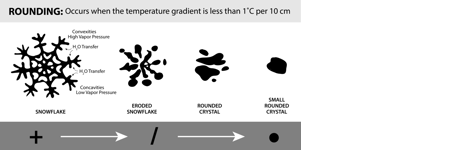

- Kay et al. 2022. “Less Surface Sea Ice Melt in the CESM2 Improves Arctic Sea Ice Simulation With Minimal Non‐Polar Climate Impacts.” https://doi.org/10.1029/2021MS002679
- Rodgers et al. 2021. “Ubiquity of human-induced changes in climate variability."  https://doi.org/10.5194/esd-12-1393-2021


In [ ]:
# Load packages we'll need
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and manipulate all the data

In [ ]:
# set data directory
data_dir = '../data/'

## Load and subset CESM2-LE data
- Keep just September data

In [ ]:
# Set the data to input
fin = 'LE2_aicetot_nh_1870-2100.nc'

# read in the data
ds1 = xr.open_mfdataset(data_dir + fin)

In [ ]:
# keep only September data (note that indexing starts at 0, so September is month 8)
mm = 8
data1 = ds1.aice_monthly.isel(nmonth=8)

In [ ]:
# convert data from m^2 to km^2
data1 = data1/(1000.0 * 1000.0)

In [ ]:
# create an array of years for this data
years_data1 = np.arange(1870,2101,1)

In [ ]:
# look at data
data1

### Questions:
- How many years of data do we have?
- How many ensemble members are there?

## Load and subset CESM2 Snow grain radius experiments
- Keep just September data
- Data is already in km^2, so no conversion is needed

In [ ]:
# Set the data to input
fin = 'LESSMELT_aicetot_nh_1920-2100.nc'

# read in the data
ds2 = xr.open_mfdataset(data_dir + fin)

In [ ]:
# keep only September data (note that it's not yet broken into months, so we filter data differently and use index 9 for September)
data2 = ds2.aice_monthly.sel(time=ds2.time.dt.month.isin(9))

In [ ]:
# get an array of years for this data
years_data2 = data2.time.dt.year.values

In [ ]:
# look at data
data2

### Questions:
- How many years of data do we have?
- How many ensemble members are there?
- Why do you think there are less of both of these? (Hint: how expensive it is to run an ESM?)

# Exercise 1

- Activity: Plot the ensemble means and standard deviations for CESM2-LE

In [ ]:
# calculate CESM2-LE ensemble mean and standard deviation
data1_mean = data1.mean(dim='n_members')
data1_std = data1.std(dim='n_members')

# get the total number of ensemble members 
n_ens_1 = len(data1.n_members)

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=1);

### Questions:
- How does this compare to the CESM1-LE we previously examined? Is it similar to what you expect?
- Is there anything that looks weird in this timeseries?

# Exercise 2
- Activity: Plot the ensemble means and standard deviations for CESM2-LE and the experiment

In [ ]:
# calculate ensemble mean and standard deviation
data2_mean = data2.mean(dim='member_id')
data2_std = data2.std(dim='member_id')

# get the total number of ensemble members 
n_ens_2 = len(data2.member_id)

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
ii=0
for ii in range(n_ens_2):
    plt.plot(years_data2,data2[ii,:],color="salmon",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data2,data2.isel(member_id=0),label='Expt Ensembles',color='salmon',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=2);

## Exercise 3

- Now, zoom in on the previous figure years

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
ii=0
for ii in range(n_ens_2):
    plt.plot(years_data2,data2[ii,:],color="salmon",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data2,data2.isel(member_id=0),label='Expt Ensembles',color='salmon',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=2);

### Questions:
- How does the experiment look different than the CESM2-LE? (Mean state and trends)
- Do you think that changing the snow grain radius and melt onset temperature lead to statistically significant changes in total sea ice area?
- Do you think that there are enough of the experimental ensembles to be certain of your conclusions?